In [1]:
import os
import glob
import pandas as pd
import numpy as np

#import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.display import Image


from fp.traindata_samplers import CompleteData
from fp.missingvalue_handlers import CompleteCaseAnalysis
from fp.missingvalue_handlers import MeanImputer
from fp.missingvalue_handlers import ModeImputer
from fp.dataset_experiments import PSIDDataset #AdultDatasetWhiteExperiment
from fp.scalers import NamedStandardScaler
from fp.learners import LogisticRegression
from fp.pre_processors import NoPreProcessing
from fp.post_processors import NoPostProcessing
from fp.dataset_experiments import AdultDatasetWhiteExperiment

import fp.datadistribution_observer as data_obs




C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\algorithms\preprocessing\lfr_helpers\helpers.py:2: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit


# Get experiment data

In [18]:
seed = 12345

_year = "11"
#_protected_attributes= [("hdrace", ["african"]), ("sprace", ["african"])]
_protected_attributes=[("hdrace", ["african", "american indian"]), ("sprace", ["african", "american indian"])]
_protected_attributes_for_classification=["headedu_" + _year, "spedu_" + _year, "hdrace"]

exp = PSIDDataset(
    fixed_random_seed=seed,
    train_data_sampler=CompleteData(),
    #missing_value_handler=[CompleteCaseAnalysis(), CompleteCaseAnalysis()],
    missing_value_handler=[MeanImputer, ModeImputer],
    missing_value_per_protected_class=True,
    numeric_attribute_scaler=NamedStandardScaler(),
    learners=[LogisticRegression()],
    pre_processors=[NoPreProcessing()],
    post_processors=[NoPostProcessing()],
    year=_year, 
    classification_target=("labels2", 2),
    protected_attributes=_protected_attributes,
    protected_attributes_for_classification=_protected_attributes_for_classification)
exp.run()

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


not_in_african_american indian    20942
african_american indian            3719
Name: eval_sprace, dtype: int64
TODO
Handle save info.
TODO
Handle save info.


C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = df[self.protected_att].apply(lambda row: "_".join(row))
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930: S

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result i

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\Fair

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'spedu_11=1.0', 'spedu_11=2.0', 'headedu_11=1.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = df[self.protected_att].apply(lambda row: "_".join(row))
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930:

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'spprob_11=0.05013927576601671', 'headprob_11=0.031746031746031744', 'headedu_11=1.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


In [2]:
# Tests with AdultDataset

seed = 12345
exp = AdultDatasetWhiteExperiment(
    fixed_random_seed=seed,
    train_data_sampler=CompleteData(),
    missing_value_handler=[MeanImputer, ModeImputer],
    missing_value_per_protected_class=False,    
    numeric_attribute_scaler=NamedStandardScaler(),
    learners=[LogisticRegression()],
    pre_processors=[NoPreProcessing()],
    post_processors=[NoPostProcessing()])
exp.run()

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income-per-year  
0          2174             0              40  United-States           <=50K  
1             0         

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result i

KeyError: 'eval_sprace'

# Analysis of data distributions

In [19]:
# Get the folder with the most recent experiment.

def all_subdirs_of(b='.'):
    result = []
    for d in os.listdir(b):
        bd = os.path.join(b, d)
        if os.path.isdir(bd): 
            result.append(bd)
    return result



In [20]:
latest_subdir = max(all_subdirs_of("logs/"), key=os.path.getmtime)

# Get data raw
#data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_distribution.csv")[0], index_col="Unnamed: 0")

# Get data sampled 
data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_sampled_distribution.csv")[0], index_col="Unnamed: 0")


In [21]:
data.shape

(17262, 34)

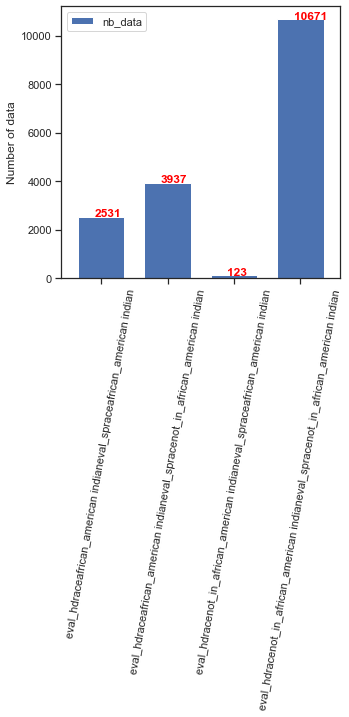

In [22]:
# Prepare the two datasets with protected/not protected.
protected_attributes = data_obs.getProtectedAttributes(data)
binary_condition = data_obs.createBinaryCondition(protected_attributes, data)
data_list_binary = [data.loc[binary_condition], data.loc[~binary_condition]]
data_name_binary = ["Protected elements", "Not protected elements"]
# Prepare the 4 datasets when there are 2 protected attributes.
if len(list(protected_attributes.keys())) == 2:
    list_condition, condition_names = data_obs.create4_4Conditions(protected_attributes, data)
    data_list_4 = []
    data_name_4 = []
    for cond, nm in zip(list_condition, condition_names):
        data_list_4.append(data.loc[cond])
        data_name_4.append(nm)


# General data distribution:
distribution_data = pd.DataFrame({"population_type":data_name_4, "nb_data": [len(data) for data in data_list_4]})
fig, ax = plt.subplots(figsize=(5,5)) 
distribution_data.plot.bar(ax=ax, width=0.7)
ax.set_xticklabels( (distribution_data["population_type"].values.tolist()))
ax.set_ylabel('Number of data')

for i, v in enumerate(distribution_data["nb_data"]):
    ax.text(i - 0.1, v + 10, str(v), color='red', fontweight='bold')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=80)
plt.show()



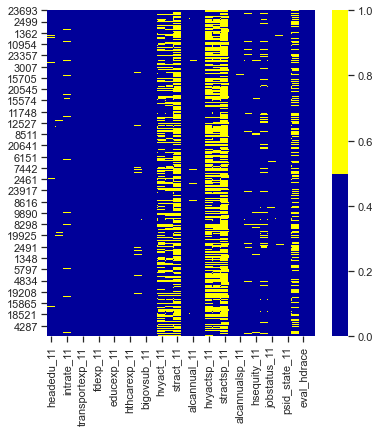

In [23]:
# Distribution per attribute.

#getNbMissingValues(data)
data_obs.plotMissingValueFeature([data], fig_size=(6,6))


2020-05-28 09:53:55,542 [WARNING]  No handles with labels found to put in legend.


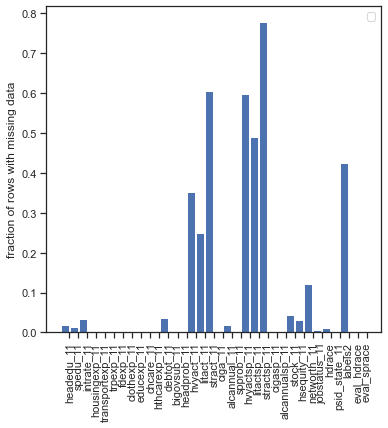

In [24]:
data_obs.plotMissingValueDistribution([data], fig_size=(6,6))

2020-05-28 09:53:56,246 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:53:57,497 [WARNING]  No handles with labels found to put in legend.


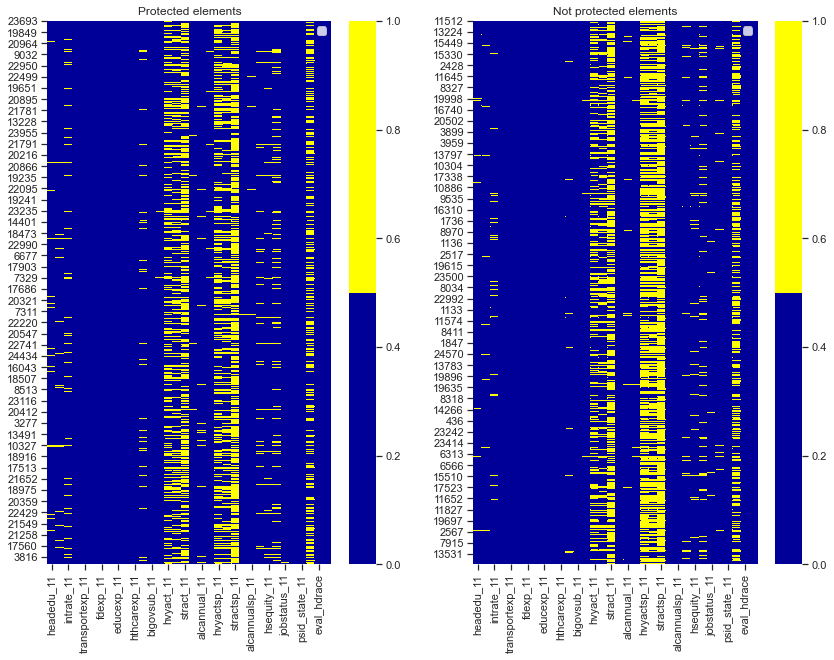

In [25]:
data_obs.plotMissingValueFeature(data_list_binary, list_names=data_name_binary, fig_size=(14,10))

In [26]:
#data_list_binary[0]

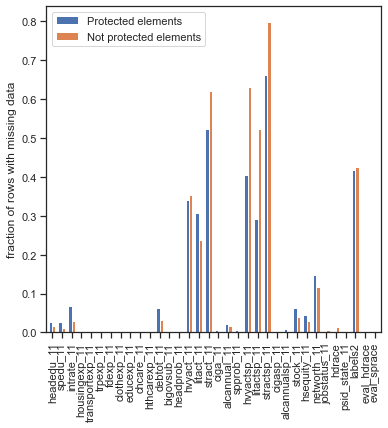

In [27]:
#plotMissingValueDistribution(data_list_binary, list_names=data_name_binary,fig_size=(14,10))
data_obs.plotMissingValueDistributionMergedTables(data_list_binary, data_name_binary, fig_size=(6,6))

2020-05-28 09:54:06,502 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:54:08,140 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:54:11,522 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:54:13,421 [WARNING]  No handles with labels found to put in legend.


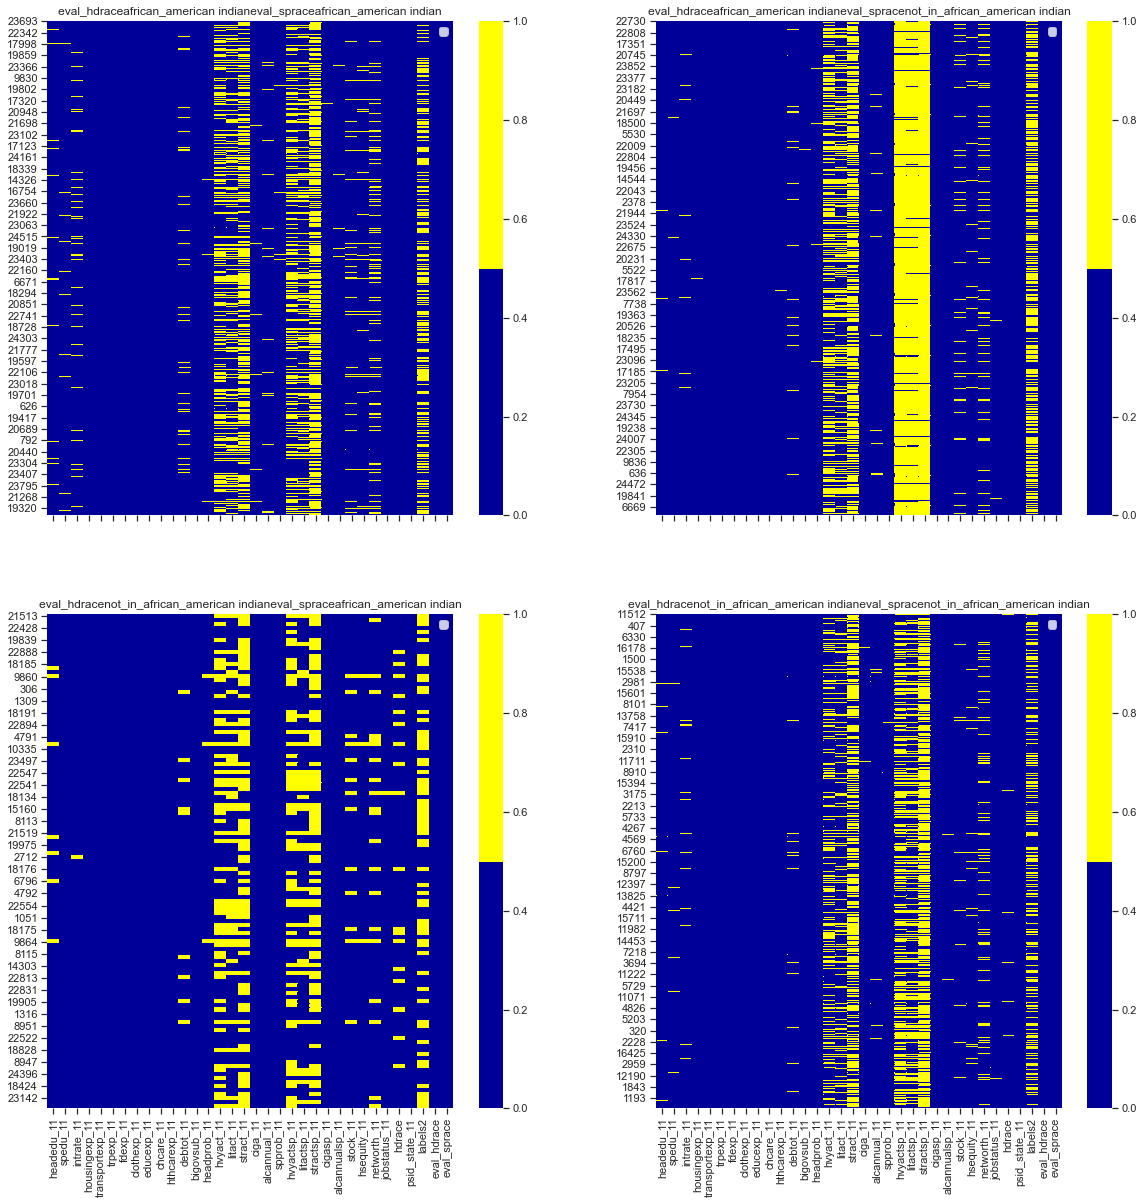

In [28]:
data_obs.plotMissingValueFeature(data_list_4, list_names=data_name_4, fig_size=(20,20))

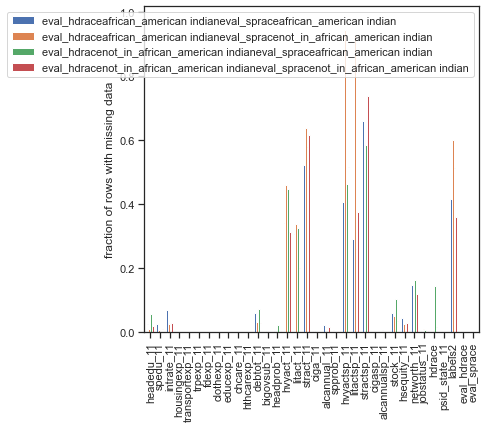

In [29]:
if len(list(protected_attributes.keys())) == 2:
    #plotMissingValueDistribution(data_list_4, list_names=data_name_4,fig_size=(14,10))
    data_obs.plotMissingValueDistributionMergedTables(data_list_4, data_name_4, fig_size=(6,6))

# Analysis of results

In [30]:
# Get results
latest_subdir = max(all_subdirs_of("logs/"), key=os.path.getmtime)

print(latest_subdir)
# Get data raw
#data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_distribution.csv")[0], index_col="Unnamed: 0")

# Get data sampled 
data = pd.read_csv(glob.glob(latest_subdir + "/*_OPTIMAL.csv")[0], header=None, \
                  names=["data_split", "protected_type", "metric", "measure"])
# Boolean prescribing whether to condition this metric on the `privileged_groups`, 
# if `True`, or the `unprivileged_groups`, if `False`. 
# Defaults to `None` meaning this metric is computed over the entire dataset.

logs/2020-05-28_09-44-02-843_psidafrican_american indian_african_american indian


In [31]:
# Select what you want to observe
data_split = "test"

#protected_type = [None, True, False]
split_metric = ["true_positive_rate", "false_positive_rate", "accuracy" ]

general_metric = ["disparate_impact", "statistical_parity_difference", "error_rate_difference", "true_positive_rate_difference"]

#data["metric"].value_counts()
# Disparate impact: It compares the proportion of individuals that receive a positive output 
# statistical parity: A classifier satisfies this definition if subjects in both protected and \
# unprotected groups have equal probability of being assigned to the positive predicted class

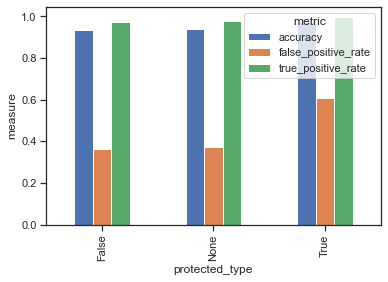

In [32]:
# Get the data
data_for_plot = data.loc[(data["data_split"] == data_split) & (data["metric"].isin(split_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
#data.loc[ (data["protected_type"] )]
#data_for_plot["metric type"] = data_for_plot["protected_type"].astype(str) + "_"+ data_for_plot["metric"]

#data_for_plot.plot(kind='bar', x='metric type', y='measure')


groupby_metric_type = data_for_plot.groupby(["protected_type", "metric"])
aggregate_groupby = groupby_metric_type['measure'].aggregate(np.sum).unstack()
aggregate_groupby.plot(kind = "bar", title = "")
plt.ylabel("measure")
plt.show()
#data_for_plot[["legend", "measure"]].plot(kind="bar", legend=True)

    data_split protected_type                         metric   measure
276       test            NaN  true_positive_rate_difference -0.021325
287       test            NaN          error_rate_difference  0.038094
289       test            NaN               disparate_impact  0.922125
290       test            NaN  statistical_parity_difference -0.076495


Text(0, 0.5, 'score')

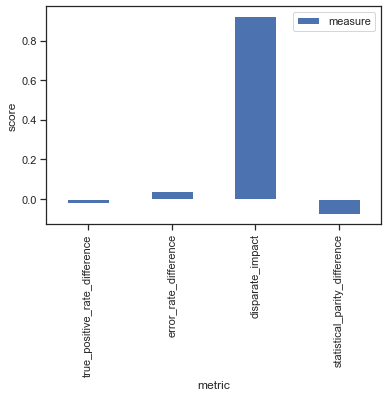

In [33]:
#data_for_plot = data.loc[(data["protected_type"] == np.nan) & (data["data_split"] == data_split) & (data["metric"].isin(general_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]

data_for_plot = data.loc[(data["data_split"] == data_split) & (data["metric"].isin(general_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
print(data_for_plot)
data_for_plot.plot(kind='bar', x='metric', y='measure')
plt.ylabel("score")